# Analysis of Populations of China vs. the United States

*by Jonathan Ma*

**Origin**: This notebook analyzes population growth of the United States and China. The data was collected from an open source JSON API, which studies world development, and contains historical population data from around the globe. The data collected spans from 1960 to 2020. 

**Importance**: Arguably the two currently most fiercely competitive world powers on Earth, China and the United States are countries with massively differing populations, in fact, the 2020 population of China (1.4 billion) is around 4.6 times the 2020 population of the US (3 hundred million). Although this is not an extensive study, many things are important when discussing population, including critical masses, workforce dynamics, fertility, etc. A country's population is its driving force. This simple data analysis aims to compare the growth rate of the two countries, as well as create a realistic look into the future of the two countries in terms of population growth, and stabilization of population. 

## Loading the Data

In [28]:
# loading JSON data with requests
import requests 
reports_us = requests.get("http://api.worldbank.org/v2/countries/USA/indicators/SP.POP.TOTL?per_page=5000&format=json").json()
reports_china = requests.get("http://api.worldbank.org/v2/countries/CHN/indicators/SP.POP.TOTL?per_page=5000&format=json").json()
# previewing first rows of raw data
from pprint import pprint
pprint(reports_us[1][0])
pprint(reports_china[1][0])

{'country': {'id': 'US', 'value': 'United States'},
 'countryiso3code': 'USA',
 'date': '2020',
 'decimal': 0,
 'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
 'obs_status': '',
 'unit': '',
 'value': 329484123}
{'country': {'id': 'CN', 'value': 'China'},
 'countryiso3code': 'CHN',
 'date': '2020',
 'decimal': 0,
 'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
 'obs_status': '',
 'unit': '',
 'value': 1402112000}


## Line Plot Analysis
Below lies a line plot comparison of the two countries populations year-by-year.

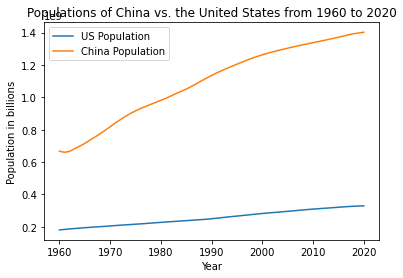

In [86]:
us_population = []
chn_population = []
for i in reversed(reports_us[1]):
    us_population.append(i["value"])
for i in reversed(reports_china[1]):
    chn_population.append(i["value"])

import matplotlib.pyplot as plt
x = range(1960,2021)

fig, ax = plt.subplots()
ax.plot(x,us_population, label = 'US Population')
ax.plot(x,chn_population, label = 'China Population')
ax.legend(loc = 'upper left')
plt.title("Populations of China vs. the United States from 1960 to 2020")
plt.xlabel("Year")
plt.ylabel("Population in billions")
plt.show()
    

This line plot demonstrates an introductory look at our data. In a preliminary glance, one can see that the population of China is far greater than the population of the US.

## Line Plot Analysis of Population Growth
Below lies a histogram analysis of the population growth of the two countries side by side.

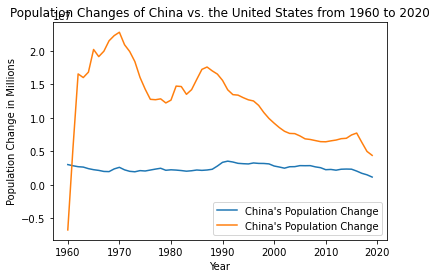

Average Rate of Change for the American Population in miilions:  2.4802187166666667
Average Rate of Change for the Chinese Population in miilions:  12.2507


In [66]:
us_population_roc = []
chn_population_roc = []
count = 0
for i in x:
    if i < 2020:
        us_population_roc.append(us_population[count+1]-us_population[count])
        count += 1
count = 0
for i in x:
    if i < 2020:
        chn_population_roc.append(chn_population[count+1]-chn_population[count])
        count += 1

fig, ax = plt.subplots()
ax.plot(x[0:-1], us_population_roc, label = "America's Population Change")
ax.plot(x[0:-1], chn_population_roc, label = "China's Population Change")
ax.legend(loc = "lower right")
plt.xlabel("Year")
plt.ylabel("Population Change in Millions")
plt.title("Population Changes of China vs. the United States from 1960 to 2020")
plt.show()
print("Average Rate of Change for the American Population in miilions: ", (sum(us_population_roc)/len(us_population_roc))/1000000)
print("Average Rate of Change for the Chinese Population in miilions: ", (sum(chn_population_roc)/len(chn_population_roc))/1000000)

An interesting point of information is gathered from this line plot analysis. China had an initial population decrease during the early 60s, which was corrected for massively in the decade that followed. From this line plot analysis, it is also clear that although the rate of changes in populations for China is greater, and more positive than that of the US.

Both countries, apart from China's 1960s depopulation stint, have experienced constant growth.

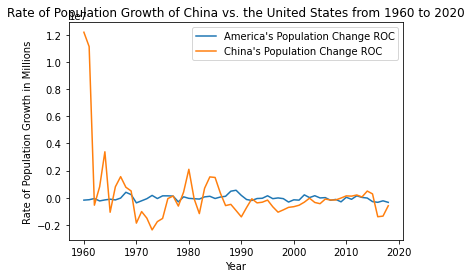

In [76]:
y1roc2 = []
y2roc2 = []
count = 0
for i in x:
    if i < 2019:
        y1roc2.append(us_population_roc[count+1]-us_population_roc[count])
        count += 1
count = 0
for i in x:
    if i < 2019:
        y2roc2.append(chn_population_roc[count+1]-chn_population_roc[count])
        count += 1
        
fig, ax = plt.subplots()
ax.plot(x[0:-2], y1roc2, label = "America's Population Change ROC")
ax.plot(x[0:-2], y2roc2, label = "China's Population Change ROC")
ax.legend(loc = "upper right")
plt.xlabel("Year")
plt.ylabel("Rate of Population Growth in Millions")
plt.title("Rate of Population Growth of China vs. the United States from 1960 to 2020")
plt.show()


This final graph visualizes the rate of change of the population change of the two countries. As one can observe, although China's population grow at a large rate in the sixties, the two countries are actually converging to parallel on rate of change of their populations.

## Histogram Analysis of Rate of Population Growth 
The two following histograms will visualize the rate of population growth in both countries.


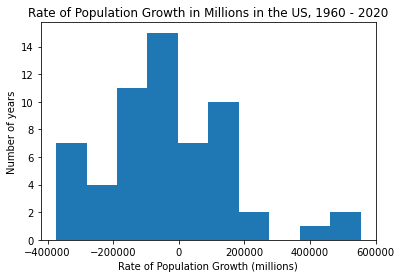

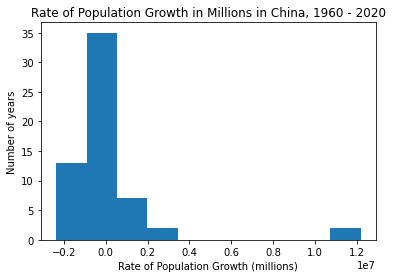

In [79]:
plt.hist(y1roc2)
plt.title("Rate of Population Growth in Millions in the US, 1960 - 2020")
plt.xlabel("Rate of Population Growth (millions)")
plt.ylabel("Number of years")
plt.show()

plt.hist(y2roc2)
plt.title("Rate of Population Growth in Millions in China, 1960 - 2020")
plt.xlabel("Rate of Population Growth (millions)")
plt.ylabel("Number of years")
plt.show()

What is interesting to note of the rates of population growth between the two countries is that although China has consistently more years with more population growth than America, including several years of extreme growth (tens of millions), the two countries are closely grouped together in growth around the -.3 million to .3 millions consisting of the majority of years of growth in both countries.

## Simple Linear Regression of Populations (Line Plot)
Below is a simple linear regression of our two countries' populations.

LinReg Summary: US Population
R^2 Score =  0.9964501804996293
Coefficient:  [[2564229.12765732]]
Intercept:  [-4.84778723e+09]

LinReg Summary: China's Population
R^2 Score =  0.9735454503037343
Coefficient:  [[13005171.60232681]]
Intercept:  [-2.47872703e+10]


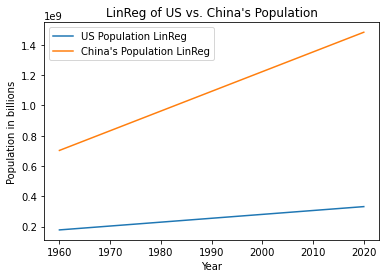

In [128]:
from sklearn import linear_model
import numpy as np
import pandas as pd
df = pd.DataFrame(x)
target = pd.DataFrame(us_population)
X = df
y = target
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)
print("LinReg Summary: US Population")
print("R^2 Score = ",lm.score(X,y))
print("Coefficient: ", lm.coef_)
print("Intercept: ", lm.intercept_)

df = pd.DataFrame(x)
target = pd.DataFrame(chn_population)
X = df
y = target
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions2 = lm.predict(X)
print("\nLinReg Summary: China's Population")
print("R^2 Score = ",lm.score(X,y))
print("Coefficient: ", lm.coef_)
print("Intercept: ", lm.intercept_)


fig, ax = plt.subplots()
ax.plot(x,predictions, label = 'US Population LinReg')
ax.plot(x,predictions2, label = "China's Population LinReg")
ax.legend(loc = 'upper left')
plt.title("LinReg of US vs. China's Population")
plt.xlabel("Year")
plt.ylabel("Population in billions")
plt.show()


Through the *sklearn*, *pandas*, and *numpy* packages, a linear regression model has been developed for the two countries population data with R squared ~.99 (US) and ~.97 (China). Above, Y-Intercepts, and coefficients have been developed. 

In [126]:
def us_linreg(x):
    return (2564229.12765732*x + -4.84778723e+09)
print("2030 expected US population: ",us_linreg(2030))
print("2050 expected US population: ",us_linreg(2050))
print("2100 expected US population: ",us_linreg(2100))

def chn_linreg(x):
    return(13005171.60232681*x + -2.47872703e+10)
print("\n2030 expected China population: ",chn_linreg(2030))
print("2050 expected China population: ",chn_linreg(2050))
print("2100 expected China population: ",chn_linreg(2100))

2030 expected US population:  357597899.1443596
2050 expected US population:  408882481.69750595
2100 expected US population:  537093938.0803719

2030 expected China population:  1613228052.7234268
2050 expected China population:  1873331484.7699623
2100 expected China population:  2523590064.886303


## Stakeholder Analysis
Two stakeholders who might be interested in this analysis are:
  - US & Chinese governments who would find this type of information crucial on determining their country's population dynamics and potential to grow industries based on their population growths. A more in-depth analysis of this subject may include demographic growths, sector growths (careers / occupations), regional growth, and age of population. It's notable to examine the parallel growth rates in the recent years of the two countries, considering China has a much larger population.
  - Fortune 500 companies looking for information on their customers. The US and China include some of the most wealthy citizens, as well as the bulk of their consumers. This analysis on population growth can benefit Fortune 500 companies who may be indecisive on which company may return more on an investment based on population growth. As both countries are growing at nearly the same rate, it may not be this analysis specifically that elucidates what decisions should be made, but it may provide a small insight on the two countries' historic growth rates. 
  